In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

In [ ]:
df= pd.read_csv("mortgage.csv")

## Problem Statement

The dataset given to us represents period data for US loans taken with unspecificed uniform periods. As in the real world, loans may originate before the start of the observation period (this is an issue where loans are transferred between banks and investors as in securitization). The data contains various attributes of mortgage-level-loans which occured in the history as well as the end of the loan for the bank.

Our dataset Contains 6,00,000 entries over 50,000 loans having default, pay_off and loan continuance.

id: Borrower ID

time: Time stamp of observation

orig_time: Time stamp for origination

first_time: Time stamp for first observation

mat_time: Time stamp for maturity

balance_time: Outstanding balance at observation time

LTV_time: Loan-to-value ratio at observation time, in %

interest_rate_time: Interest rate at observation time, in %

hpi_time: House price index at observation time, base year = 100

gdp_time: Gross domestic product (GDP) growth at observation time, in %

uer_time: Unemployment rate at observation time, in %

REtype_CO_orig_time: Real estate type condominium = 1, otherwise = 0

REtype_PU_orig_time: Real estate type planned urban development = 1, otherwise = 0

REtype_SF_orig_time: Single-family home = 1, otherwise = 0

investor_orig_time: Investor borrower = 1, otherwise = 0

balance_orig_time: Outstanding balance at origination time

FICO_orig_time: FICO score at origination time, in %

LTV_orig_time: Loan-to-value ratio at origination time, in %

Interest_Rate_orig_time: Interest rate at origination time, in %

hpi_orig_time: House price index at origination time, base year = 100

default_time: Default observation at observation time

payoff_time: Payoff observation at observation time

status_time: Default (1), payoff (2), and nondefault/nonpayoff (0) observation at observation time

Objectives:-
1. Data pre-processing & Exploratory Data Analysis for relations between attributes.
2. Bank Perspective: Predicting whether a loan will be payed-off, defaulted or be continued form the bank's perspective.
3. Customer Perspective: Determining whether its better to continue paying a loan (even in unfavourable conditions) or to default early as which would have happended eventually and save money as given to the bank.

## Dataset


In [ ]:
df.head()

,id,time,orig_time,first_time,mat_time,balance_time,LTV_time,interest_rate_time,hpi_time,gdp_time,uer_time,REtype_CO_orig_time,REtype_PU_orig_time,REtype_SF_orig_time,investor_orig_time,balance_orig_time,FICO_orig_time,LTV_orig_time,Interest_Rate_orig_time,hpi_orig_time,default_time,payoff_time,status_time
0,1,25,-7,25,113,41303.42,24.498336,9.2,226.29,2.899137,4.7,0,0,1,0,45000.0,715,69.4,9.2,87.03,0,0,0
1,1,26,-7,25,113,41061.95,24.483867,9.2,225.10,2.151365,4.7,0,0,1,0,45000.0,715,69.4,9.2,87.03,0,0,0
2,1,27,-7,25,113,40804.42,24.626795,9.2,222.39,2.361722,4.4,0,0,1,0,45000.0,715,69.4,9.2,87.03,0,0,0
3,1,28,-7,25,113,40483.89,24.735883,9.2,219.67,1.229172,4.6,0,0,1,0,45000.0,715,69.4,9.2,87.03,0,0,0
4,1,29,-7,25,113,40367.06,24.925476,9.2,217.37,1.692969,4.5,0,0,1,0,45000.0,715,69.4,9.2,87.03,0,0,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 622489 entries, 0 to 622488
Data columns (total 23 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   id                       622489 non-null  int64  
 1   time                     622489 non-null  int64  
 2   orig_time                622489 non-null  int64  
 3   first_time               622489 non-null  int64  
 4   mat_time                 622489 non-null  int64  
 5   balance_time             622489 non-null  float64
 6   LTV_time                 622219 non-null  float64
 7   interest_rate_time       622489 non-null  float64
 8   hpi_time                 622489 non-null  float64
 9   gdp_time                 622489 non-null  float64
 10  uer_time                 622489 non-null  float64
 11  REtype_CO_orig_time      622489 non-null  int64  
 12  REtype_PU_orig_time      622489 non-null  int64  
 13  REtype_SF_orig_time      622489 non-null  int64  
 14  inve

In [ ]:
df.head(67).tail(37)

,id,time,orig_time,first_time,mat_time,balance_time,LTV_time,interest_rate_time,hpi_time,gdp_time,uer_time,REtype_CO_orig_time,REtype_PU_orig_time,REtype_SF_orig_time,investor_orig_time,balance_orig_time,FICO_orig_time,LTV_orig_time,Interest_Rate_orig_time,hpi_orig_time,default_time,payoff_time,status_time
30,3,29,-6,25,114,44378.60,31.459735,11.375,217.37,1.692969,4.5,0,0,1,0,48600.0,680,83.6,8.750,89.58,0,1,2
31,4,25,-2,25,119,61031.10,33.911009,10.500,226.29,2.899137,4.7,0,0,1,0,63750.0,587,81.8,10.500,97.99,0,0,0
32,4,26,-2,25,119,60882.42,34.007232,10.500,225.10,2.151365,4.7,0,0,1,0,63750.0,587,81.8,10.500,97.99,0,0,0
33,4,27,-2,25,119,60729.80,34.335349,10.500,222.39,2.361722,4.4,0,0,1,0,63750.0,587,81.8,10.500,97.99,0,0,0
34,4,28,-2,25,119,60576.14,34.672545,10.875,219.67,1.229172,4.6,0,0,1,0,63750.0,587,81.8,10.500,97.99,0,0,0
35,4,29,-2,25,119,60424.39,34.951639,10.875,217.37,1.692969,4.5,0,0,1,0,63750.0,587,81.8,10.500,97.99,0,0,0
36,4,30,-2,25,119,60268.48,35.621842,10.875,212.73,2.274218,4.7,0,0,1,0,63750.0,587,81.8,10.500,97.99,0,0,0
37,4,31,-2,25,119,60108.28,37.662290,10.875,200.67,1.850689,4.7,0,0,1,0,63750.0,587,81.8,10.500,97.99,0,0,0
38,4,32,-2,25,119,59944.71,40.496053,11.000,186.12,1.104163,5.0,0,0,1,0,63750.0,587,81.8,10.500,97.99,0,0,0
39,4,33,-2,25,119,59778.68,41.636658,11.000,180.52,0.836859,5.0,0,0,1,0,63750.0,587,81.8,10.500,97.99,0,0,0


In a specific data point:-

LTV_orig_time,FICO_orig_time,balance_orig_time, id , orig_time,first_time,mat_time,Interest_Rate_orig_time,hpi_orig_time: Constant Attribute

time: Nominal Attribute (Redundant can be changed to starting and ending period)

uer_time,gdp_time,hpi_time,interest_rate_time, LTV_time,balance_time: Time series real value data.

investor_orig_time, REtype_CO_orig_time, REtype_PU_orig_time, REtype_SF_orig_time: Constant Binary Data 

default_time, payoff_time,status_time: Default (1), payoff (2), and nondefault/nonpayoff (0) observation at observation time ( Just represents a simple class attribute therefore can be combined)


## Data Preprocessing

## Data Cleaning

In [ ]:
count_of_NaN = df.isnull().sum().sum()
print(count_of_NaN)

ldict = {}
i=0
for col in df.columns:
    ldict[col] = df[col].isnull().sum()
print(ldict)
print(ldict["LTV_time"])

270
{'id': 0, 'time': 0, 'orig_time': 0, 'first_time': 0, 'mat_time': 0, 'balance_time': 0, 'LTV_time': 270, 'interest_rate_time': 0, 'hpi_time': 0, 'gdp_time': 0, 'uer_time': 0, 'REtype_CO_orig_time': 0, 'REtype_PU_orig_time': 0, 'REtype_SF_orig_time': 0, 'investor_orig_time': 0, 'balance_orig_time': 0, 'FICO_orig_time': 0, 'LTV_orig_time': 0, 'Interest_Rate_orig_time': 0, 'hpi_orig_time': 0, 'default_time': 0, 'payoff_time': 0, 'status_time': 0}
270


In [ ]:
df = df.dropna()

## Data Structuring

In [ ]:
df['balance_time']/=df['balance_orig_time']

### Creating Individual DataSet Tables. 

In [ ]:
df1=df[['id','uer_time','gdp_time','hpi_time','interest_rate_time', 'LTV_time','balance_time']]
df2=df.drop(['first_time','uer_time','gdp_time','hpi_time','interest_rate_time', 'LTV_time','balance_time','time','status_time'],axis=1)

In [ ]:
df2_tmp= df2.groupby("id").last()
df2_tmp.head(5)

,orig_time,mat_time,REtype_CO_orig_time,REtype_PU_orig_time,REtype_SF_orig_time,investor_orig_time,balance_orig_time,FICO_orig_time,LTV_orig_time,Interest_Rate_orig_time,hpi_orig_time,default_time,payoff_time
id,,,,,,,,,,,,,
1,-7,113,0,0,1,0,45000.0,715,69.4,9.200,87.03,1,0
2,18,138,0,0,1,0,107200.0,558,80.0,7.680,186.91,0,1
3,-6,114,0,0,1,0,48600.0,680,83.6,8.750,89.58,0,1
4,-2,119,0,0,1,0,63750.0,587,81.8,10.500,97.99,0,0
5,18,138,0,0,1,0,52800.0,527,80.0,9.155,186.91,0,1


In [ ]:
df2_tmp['interval']=df2.groupby(by='id').count().iloc[:,0]
del df2
df2_tmp.head(5)

,orig_time,mat_time,REtype_CO_orig_time,REtype_PU_orig_time,REtype_SF_orig_time,investor_orig_time,balance_orig_time,FICO_orig_time,LTV_orig_time,Interest_Rate_orig_time,hpi_orig_time,default_time,payoff_time,interval
id,,,,,,,,,,,,,,
1,-7,113,0,0,1,0,45000.0,715,69.4,9.200,87.03,1,0,24
2,18,138,0,0,1,0,107200.0,558,80.0,7.680,186.91,0,1,2
3,-6,114,0,0,1,0,48600.0,680,83.6,8.750,89.58,0,1,5
4,-2,119,0,0,1,0,63750.0,587,81.8,10.500,97.99,0,0,35
5,18,138,0,0,1,0,52800.0,527,80.0,9.155,186.91,0,1,3


In [ ]:
df1.head(60).tail(20)

,id,uer_time,gdp_time,hpi_time,interest_rate_time,LTV_time,balance_time
40,4,5.8,-0.314448,173.35,10.50,43.231936,0.934961
41,4,6.5,-2.805844,162.09,10.50,46.089096,0.932007
42,4,7.8,-3.516568,151.48,10.50,49.156858,0.928976
43,4,9.0,-4.146711,153.35,9.25,48.394751,0.925864
44,4,9.5,-3.339549,158.77,9.25,46.581410,0.922669
45,4,10.0,-0.241081,158.16,9.25,46.594884,0.919390
46,4,9.8,1.585966,156.21,9.25,47.003836,0.916024
47,4,9.9,2.682497,161.06,9.25,45.416483,0.912570
48,4,9.4,3.029499,161.00,9.25,45.256864,0.909024
49,4,9.4,2.694111,156.04,9.25,46.508449,0.905384


## Data Normalization 
In Time series data is Min-Max Scaling is done. Other attributes do not require Normalization at this stage.

## Data Imbalance

In [ ]:
y_bar = df["status_time"].value_counts()
y_bar[0] = len(df2_tmp)-y_bar[1]-y_bar[2]

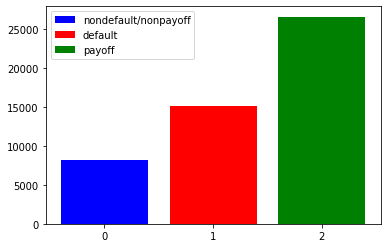

In [ ]:
plt.bar(["0"],y_bar[0],color='blue',label='nondefault/nonpayoff')
plt.bar(["1"],y_bar[1],color='red',label='default')
plt.bar(["2"],y_bar[2],color='green',label='payoff')
plt.legend()

For Objective 2, The dataset is imbalanced and therefore we will utilize techniques like Over Sampling and SMOTE.

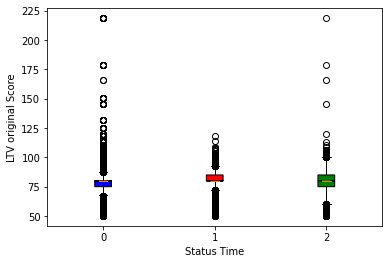

In [ ]:
df_temp_1 = df[df.status_time.isin([1])][["LTV_orig_time","status_time"]]
df_temp_2 = df[df.status_time.isin([2])][["LTV_orig_time","status_time"]]
df_temp_3 = df[df.status_time.isin([0])][["LTV_orig_time","status_time"]]

gk_1 = df_temp_1.groupby("LTV_orig_time")
gk_2 = df_temp_2.groupby("LTV_orig_time")
gk_3 = df_temp_3.groupby("LTV_orig_time")
y_freq_1 = list(gk_1.size())
x_freq_1 = list(gk_1.groups.keys())
y_freq_2 = list(gk_2.size())
x_freq_2 = list(gk_2.groups.keys())
y_freq_3 = list(gk_3.size())
x_freq_3 = list(gk_3.groups.keys())

newdata_1 = np.repeat(x_freq_1,y_freq_1)
newdata_2 = np.repeat(x_freq_2,y_freq_2)
newdata_3 = np.repeat(x_freq_3,y_freq_3)
fig,ax = plt.subplots()
bp1 = ax.boxplot(newdata_3,positions=[0],notch=True,patch_artist=True,boxprops=dict(facecolor="blue"))
bp2 = ax.boxplot(newdata_1,positions=[1],notch=True,patch_artist=True,boxprops=dict(facecolor="red"))
bp3 = ax.boxplot(newdata_2,positions=[2],notch=True,patch_artist=True,boxprops=dict(facecolor="green"))
plt.xlabel("Status Time")
plt.ylabel("LTV original Score")
plt.show()

We analyze that after ignoring outliers the default loans are having a higher LTV as compared to other classes.

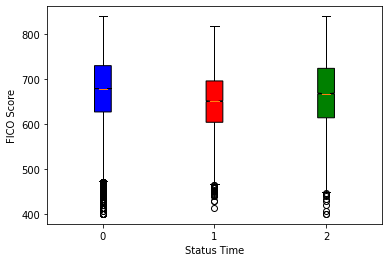

In [ ]:
df_temp_1 = df[df.status_time.isin([1])][["FICO_orig_time","status_time"]]
df_temp_2 = df[df.status_time.isin([2])][["FICO_orig_time","status_time"]]
df_temp_3 = df[df.status_time.isin([0])][["FICO_orig_time","status_time"]]

gk_1 = df_temp_1.groupby("FICO_orig_time")
gk_2 = df_temp_2.groupby("FICO_orig_time")
gk_3 = df_temp_3.groupby("FICO_orig_time")
y_freq_1 = list(gk_1.size())
x_freq_1 = list(gk_1.groups.keys())
y_freq_2 = list(gk_2.size())
x_freq_2 = list(gk_2.groups.keys())
y_freq_3 = list(gk_3.size())
x_freq_3 = list(gk_3.groups.keys())

newdata_1 = np.repeat(x_freq_1,y_freq_1)
newdata_2 = np.repeat(x_freq_2,y_freq_2)
newdata_3 = np.repeat(x_freq_3,y_freq_3)
fig,ax = plt.subplots()
bp1 = ax.boxplot(newdata_3,positions=[0],notch=True,patch_artist=True,boxprops=dict(facecolor="blue"))
bp2 = ax.boxplot(newdata_1,positions=[1],notch=True,patch_artist=True,boxprops=dict(facecolor="red"))
bp3 = ax.boxplot(newdata_2,positions=[2],notch=True,patch_artist=True,boxprops=dict(facecolor="green"))
plt.xlabel("Status Time")
plt.ylabel("FICO Score")
plt.show()

FICO Score which is an important metric in giving the loans follows that in case of defaults the FICO Score distribution median is lower though the distribution is appoximately the same.

<AxesSubplot:>

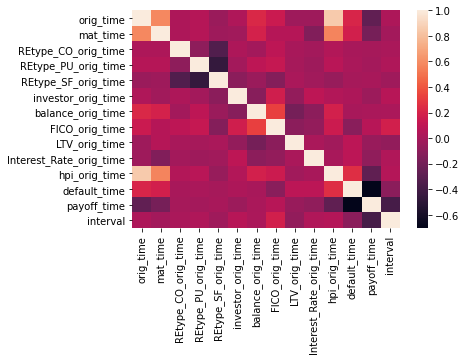

In [ ]:
import seaborn as sns
sns.heatmap(df2_tmp.corr())

<AxesSubplot:xlabel='x', ylabel='y'>

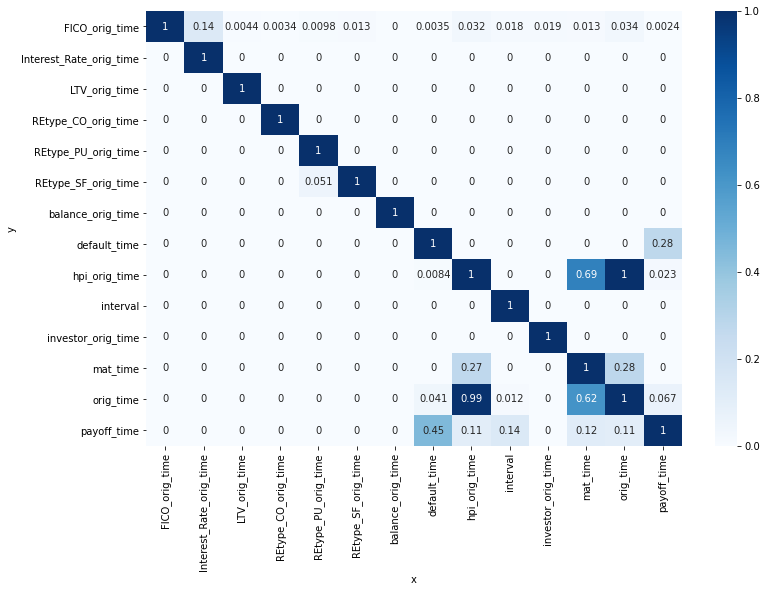

In [ ]:
plt.figure(figsize=(12,8))
import ppscore as pps
matrix=pps.matrix(df2_tmp).pivot(columns='x',index='y',values='ppscore')
sns.heatmap(matrix,annot=True,cmap="Blues")

In [ ]:
matrix

x,FICO_orig_time,Interest_Rate_orig_time,LTV_orig_time,REtype_CO_orig_time,REtype_PU_orig_time,REtype_SF_orig_time,balance_orig_time,default_time,hpi_orig_time,interval,investor_orig_time,mat_time,orig_time,payoff_time
y,,,,,,,,,,,,,,
FICO_orig_time,1.0,0.140213,0.004417,0.003422,0.009758,0.01323,0.0,0.003504,0.032241,0.017809,0.018617,0.013487,0.034477,0.002377
Interest_Rate_orig_time,0.0,1.000000,0.000000,0.000000,0.000000,0.00000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
LTV_orig_time,0.0,0.000000,1.000000,0.000000,0.000000,0.00000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
REtype_CO_orig_time,0.0,0.000000,0.000000,1.000000,0.000000,0.00000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
REtype_PU_orig_time,0.0,0.000000,0.000000,0.000000,1.000000,0.00000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
REtype_SF_orig_time,0.0,0.000000,0.000000,0.000000,0.051309,1.00000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
balance_orig_time,0.0,0.000000,0.000000,0.000000,0.000000,0.00000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
default_time,0.0,0.000000,0.000000,0.000000,0.000000,0.00000,0.0,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.275937
hpi_orig_time,0.0,0.000000,0.000000,0.000000,0.000000,0.00000,0.0,0.008450,1.000000,0.000000,0.000000,0.688964,0.999575,0.022761


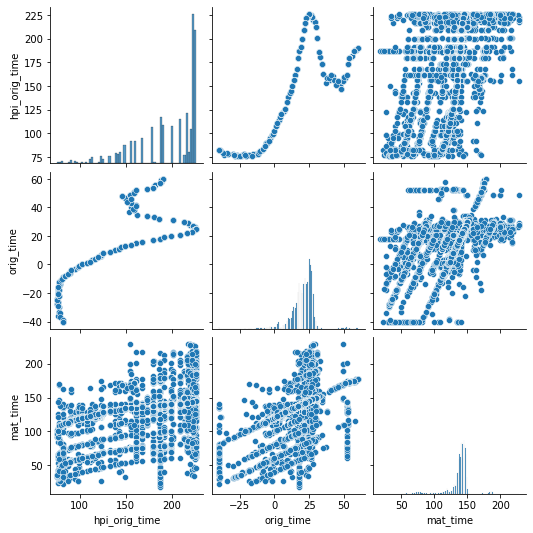

In [ ]:
sns.pairplot(df2_tmp.loc[:,['hpi_orig_time','orig_time','mat_time']])

In [ ]:
df2_tmp.drop(['orig_time'],inplace=True,axis=1)

In [ ]:
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

sc = StandardScaler()

X = sc.fit_transform(df2_tmp.drop(['default_time','payoff_time'],axis=1))

pca = PCA(n_components = 9)

X = pca.fit_transform(X)
explained_variance = pca.explained_variance_ratio_
print(explained_variance)

[0.17702982 0.13540369 0.11821908 0.10771714 0.09778994 0.08564257
 0.08384337 0.07599767 0.04900351]


In [ ]:
explained_variance

array([0.17702982, 0.13540369, 0.11821908, 0.10771714, 0.09778994,
       0.08564257, 0.08384337, 0.07599767, 0.04900351])

/home/deepank/.local/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/deepank/.local/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/deepank/.local/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `hist

/home/deepank/.local/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/deepank/.local/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/deepank/.local/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `hist

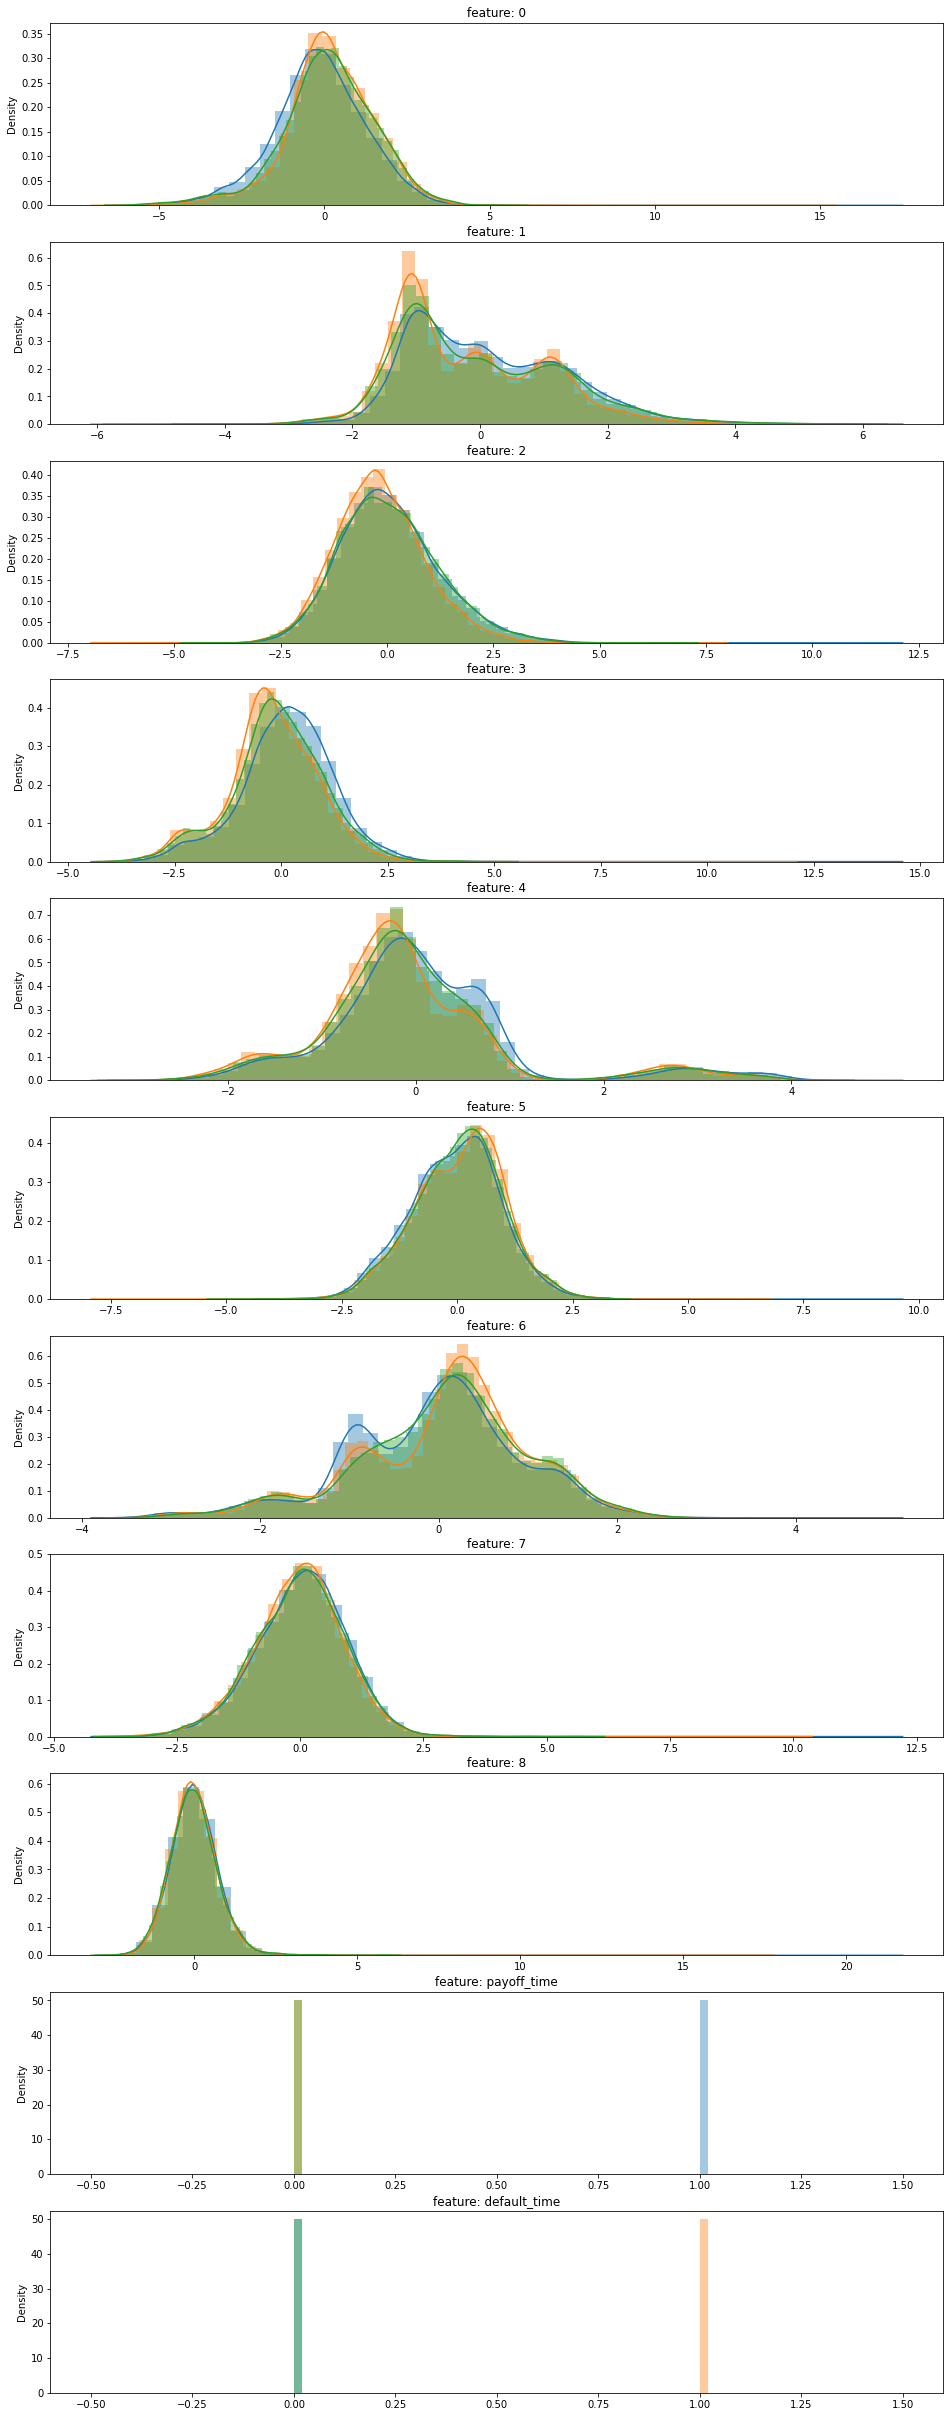

In [ ]:
import matplotlib.gridspec as gridspec
import seaborn as sns
plt.figure(figsize=(16,28*4))
gs = gridspec.GridSpec(28, 1)
X=pd.DataFrame(X)
X['payoff_time']=df2_tmp['payoff_time']
X['default_time']=df2_tmp['default_time']
for i, cn in enumerate(X):
    ax = plt.subplot(gs[i])
    sns.distplot(X[cn][X.payoff_time == 1], bins=50)
    sns.distplot(X[cn][X.default_time == 1], bins=50)
    sns.distplot(X[cn][X.default_time == 0][X.payoff_time==0], bins=50)
    ax.set_xlabel('')
    ax.set_title('feature: ' + str(cn))

Here, we have used PCA to reduce the dependence of outliers and to approximate the data. 

<AxesSubplot:xlabel='x', ylabel='y'>

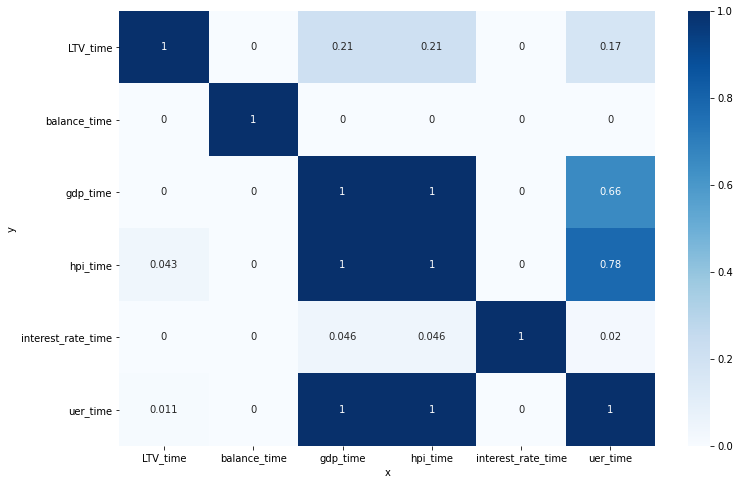

In [ ]:
plt.figure(figsize=(12,8))
import ppscore as pps
matrix=pps.matrix(df1.drop(['id'],axis=1)).pivot(columns='x',index='y',values='ppscore')
sns.heatmap(matrix,annot=True,cmap="Blues")

In [ ]:
matrix

x,LTV_time,balance_time,gdp_time,hpi_time,interest_rate_time,uer_time
y,,,,,,
LTV_time,1.000000,0.0,0.209551,0.209537,0.0,0.173913
balance_time,0.000000,1.0,0.000000,0.000000,0.0,0.000000
gdp_time,0.000000,0.0,1.000000,0.999829,0.0,0.655956
hpi_time,0.042752,0.0,0.999504,1.000000,0.0,0.779220
interest_rate_time,0.000000,0.0,0.045932,0.046161,1.0,0.019890
uer_time,0.011205,0.0,0.999770,0.999976,0.0,1.000000


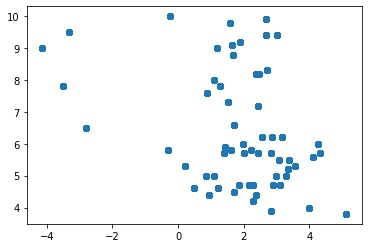

In [ ]:
import matplotlib as mpl
mpl.rcParams['agg.path.chunksize'] = 10000
plt.scatter(df1['gdp_time'],df1['uer_time'])

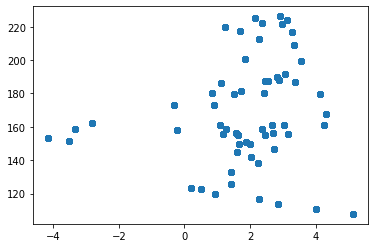

In [ ]:
import matplotlib as mpl
mpl.rcParams['agg.path.chunksize'] = 10000
plt.scatter(df1['gdp_time'],df1['hpi_time'])

In [ ]:
df1.drop(['hpi_time','uer_time'],axis=1,inplace=True)

/home/deepank/.local/lib/python3.8/site-packages/pandas/core/frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [ ]:
df1.head(2)

,id,gdp_time,interest_rate_time,LTV_time,balance_time
0,1,2.899137,9.2,24.498336,0.917854
1,1,2.151365,9.2,24.483867,0.912488


In [ ]:
df1_tmp=df1.groupby("id").last()

In [ ]:
df2=df2_tmp.merge(df1_tmp, on='id', how='left')
df2=df2.drop(["payoff_time"],axis=1)
df2.head(2)

,mat_time,REtype_CO_orig_time,REtype_PU_orig_time,REtype_SF_orig_time,investor_orig_time,balance_orig_time,FICO_orig_time,LTV_orig_time,Interest_Rate_orig_time,hpi_orig_time,default_time,interval,gdp_time,interest_rate_time,LTV_time,balance_time
id,,,,,,,,,,,,,,,,
1,113,0,0,1,0,45000.0,715,69.4,9.20,87.03,1,24,2.715903,9.20,26.658065,0.646382
2,138,0,0,1,0,107200.0,558,80.0,7.68,186.91,0,2,2.151365,7.68,65.469851,0.985586


In [ ]:
Y=df2['default_time']
X=df2.drop(['default_time'],axis=1)
df2=X.copy()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.1, random_state = 42)

In [ ]:
import lightgbm as lgb
gbm_ori = lgb.LGBMClassifier(boosting_type='gbdt', class_weight=None,
               colsample_bytree=0.8818838538279375, importance_type='split',
               learning_rate=0.1, max_depth=-1, metric='None',
               min_child_samples=424, min_child_weight=0.1, min_split_gain=0.0,
               n_estimators=5000, n_jobs=4, num_leaves=39, objective=None,
               random_state=42, reg_alpha=7, reg_lambda=20, silent=True,
               subsample=0.6286197472598067, subsample_for_bin=200000,
               subsample_freq=0)
gbm_ori.fit(X_train, Y_train)

LGBMClassifier(colsample_bytree=0.8818838538279375, metric='None',
               min_child_samples=424, min_child_weight=0.1, n_estimators=5000,
               n_jobs=4, num_leaves=39, random_state=42, reg_alpha=7,
               reg_lambda=20, subsample=0.6286197472598067)

In [ ]:
import shap

# print the JS visualization code to the notebook
shap.initjs()

In [ ]:
explainer = shap.TreeExplainer(gbm_ori)

In [ ]:
shap_values = explainer.shap_values(X)

LightGBM binary classifier with TreeExplainer shap values output has changed to a list of ndarray


In [ ]:
explainer.expected_value

[1.8027253433447619, -1.8027253433447619]

In [ ]:
k=2

In [ ]:
shap.force_plot(explainer.expected_value[0], shap_values[0][k:k+1], X.iloc[k:k+1])

In [ ]:
print(gbm_ori.predict(X.iloc[k:k+1,:]))
gbm_ori.predict_proba(X.iloc[k:k+1,:])

[0]


array([[0.90884848, 0.09115152]])

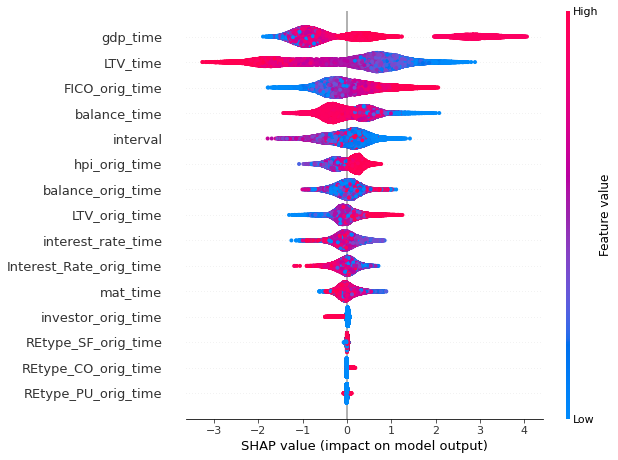

In [ ]:
shap.summary_plot(shap_values[0], X)

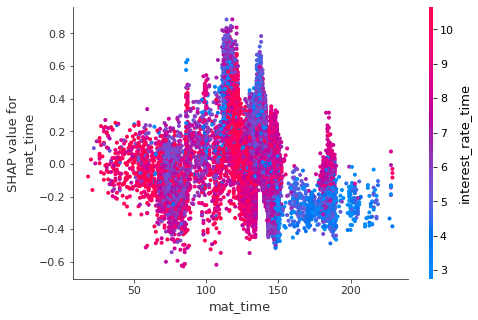

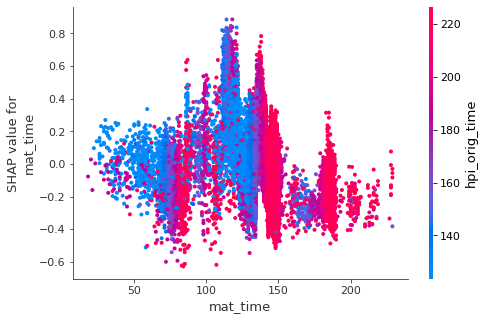

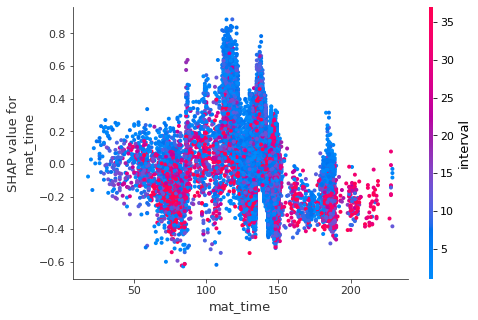

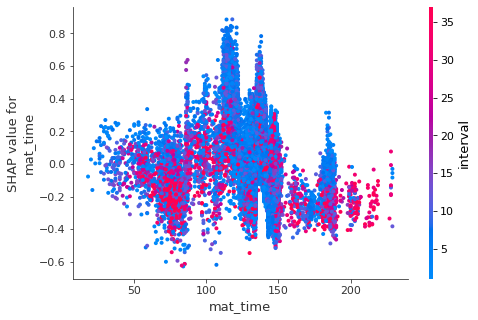

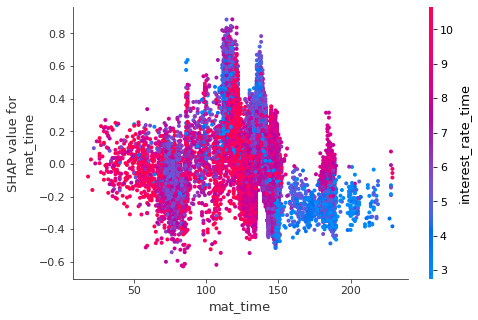

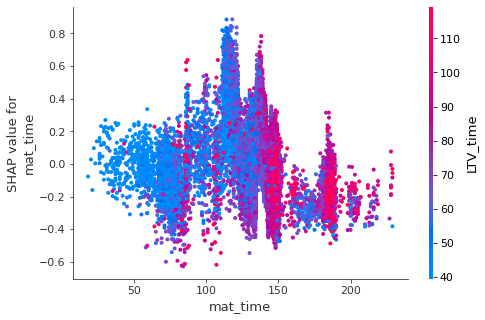

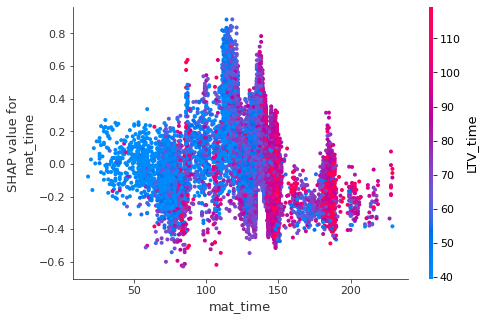

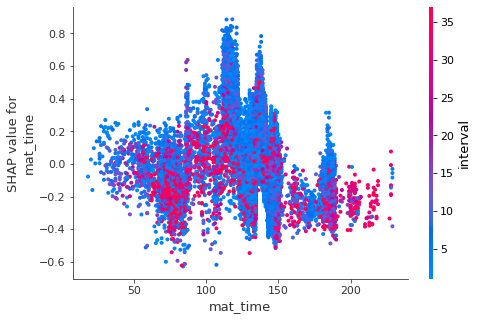

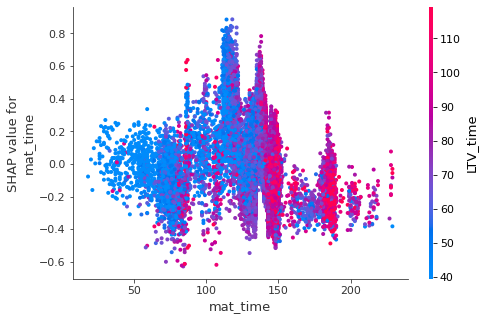

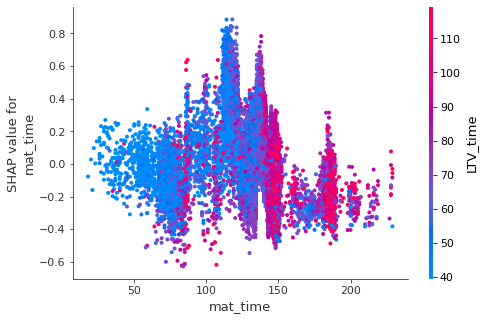

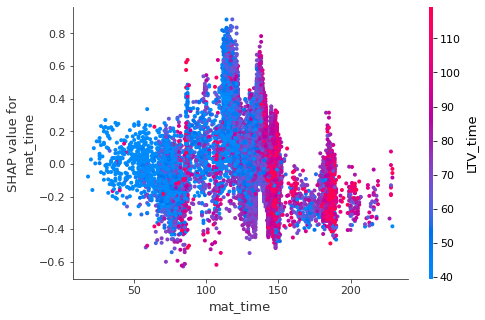

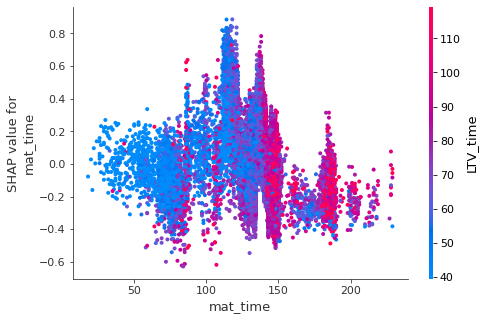

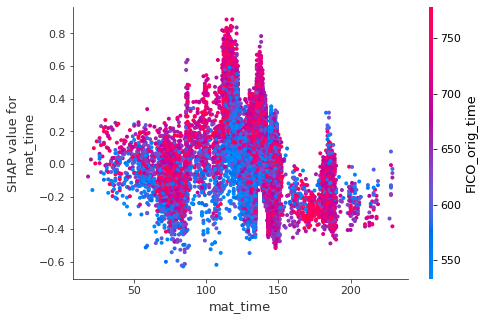

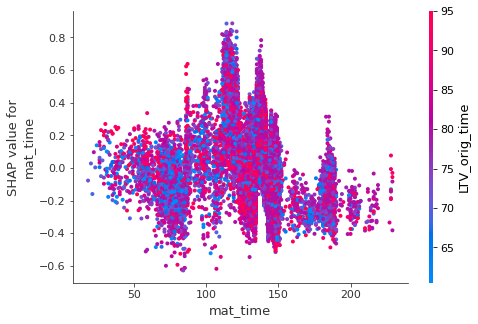

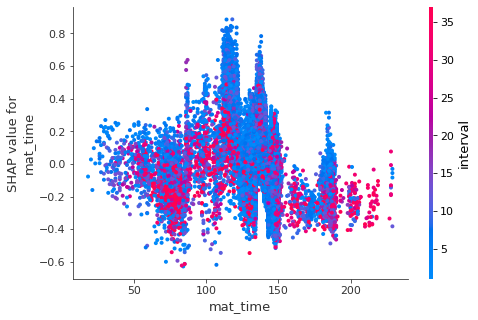

In [ ]:
for i in range(0,len(X.columns)):
    inds = shap.approximate_interactions(X.columns[i],shap_values[0], X)
    for i in range(1):
        shap.dependence_plot(X.columns[i], shap_values[0], X, interaction_index=inds[i])

In [ ]:
ID=1
Y.loc[ID]

1

In [ ]:
df_tmp=df2_tmp.iloc[ID-1,:]
df_tmp=df_tmp.to_frame()
df_tmp=df_tmp.transpose()
df_tmp=df_tmp.reset_index().drop(['index'],axis=1)
df_tmp

,mat_time,REtype_CO_orig_time,REtype_PU_orig_time,REtype_SF_orig_time,investor_orig_time,balance_orig_time,FICO_orig_time,LTV_orig_time,Interest_Rate_orig_time,hpi_orig_time,default_time,payoff_time,interval
0,113.0,0.0,0.0,1.0,0.0,45000.0,715.0,69.4,9.2,87.03,1.0,0.0,24.0


In [ ]:
df_ele=df1[df1.id==ID].drop(['id'],axis=1)

In [ ]:
ls=[[],[]]
for i in range(0,len(df_ele)):
    df_temp=pd.concat([df_tmp,df_ele.iloc[i:i+1,:].reset_index().drop(['index'],axis=1)],axis=1).drop(['payoff_time','default_time'],axis=1)
    #print(df_temp)
    ls[0].append(gbm_ori.predict_proba(df_temp)[0][0])
    ls[1].append(gbm_ori.predict_proba(df_temp)[0][1])

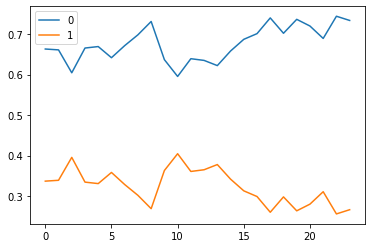

In [ ]:
plt.plot(ls[0])
plt.plot(ls[1])
plt.legend(["0","1"])

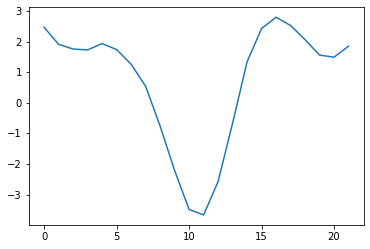

In [ ]:
plt.plot(df1[df1['id']==1]['gdp_time'].rolling(3).mean().tolist()[2:])

In [ ]:
ID=4
Y.loc[ID]

0

In [ ]:
df_tmp=df2_tmp.iloc[ID-1,:]
df_tmp=df_tmp.to_frame()
df_tmp=df_tmp.transpose()
df_tmp=df_tmp.reset_index().drop(['index'],axis=1)
df_tmp

,mat_time,REtype_CO_orig_time,REtype_PU_orig_time,REtype_SF_orig_time,investor_orig_time,balance_orig_time,FICO_orig_time,LTV_orig_time,Interest_Rate_orig_time,hpi_orig_time,default_time,payoff_time,interval
0,119.0,0.0,0.0,1.0,0.0,63750.0,587.0,81.8,10.5,97.99,0.0,0.0,35.0


In [ ]:
df_ele=df1[df1.id==ID].drop(['id'],axis=1)

In [ ]:
ls=[[],[]]
for i in range(0,len(df_ele)):
    df_temp=pd.concat([df_tmp,df_ele.iloc[i:i+1,:].reset_index().drop(['index'],axis=1)],axis=1).drop(['payoff_time','default_time'],axis=1)
    #print(df_temp)
    ls[0].append(gbm_ori.predict_proba(df_temp)[0][0])
    ls[1].append(gbm_ori.predict_proba(df_temp)[0][1])

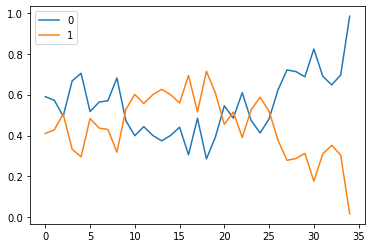

In [ ]:
plt.plot(ls[0])
plt.plot(ls[1])
plt.legend(["0","1"])

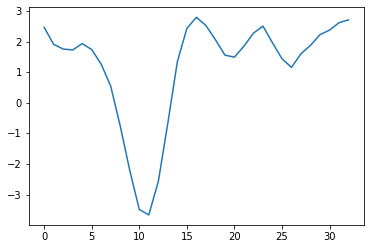

In [ ]:
plt.plot(df1[df1['id']==4]['gdp_time'].rolling(3).mean().tolist()[2:])

In [ ]:
ID=1
df_ele=df1[df1.id==ID].drop(['id'],axis=1)

In [ ]:
df_no_c = df_ele.loc[:, (df_ele != df_ele.iloc[0]).any()]

In [ ]:
from statsmodels.tsa.statespace.varmax import VARMAX
model = VARMAX(df_no_c, order=(1, 1))
model_fit = model.fit()

Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.


In [ ]:
# make prediction
yhat = model_fit.forecast()
print(yhat)

    gdp_time   LTV_time  balance_time
24  3.220135  26.482571      0.647032


In [ ]:
df_tmp=df2_tmp.iloc[ID-1,:]
df_tmp=df_tmp.to_frame()
df_tmp=df_tmp.transpose()
df_tmp=df_tmp.reset_index().drop(['index'],axis=1)
df_tmp

df_ele=df1[df1.id==ID].drop(['id'],axis=1)

ls=[[],[]]
for i in range(0,len(df_ele)):
    df_temp=pd.concat([df_tmp,df_ele.iloc[i:i+1,:].reset_index().drop(['index'],axis=1)],axis=1).drop(['payoff_time','default_time'],axis=1)
    #print(df_temp)
    ls[0].append(gbm_ori.predict_proba(df_temp)[0][0])
    ls[1].append(gbm_ori.predict_proba(df_temp)[0][1])

In [ ]:
if yhat.shape[1]==3:
    yhat['interest_rate_time']=df_ele.loc[0,'interest_rate_time']
yhat

,gdp_time,LTV_time,balance_time,interest_rate_time
24,3.220135,26.482571,0.647032,9.2


In [ ]:
df_temp=pd.concat([df_tmp,yhat.reset_index().drop(['index'],axis=1)],axis=1).drop(['payoff_time','default_time'],axis=1)
ls[0].append(gbm_ori.predict_proba(df_temp)[0][0])
ls[1].append(gbm_ori.predict_proba(df_temp)[0][1])

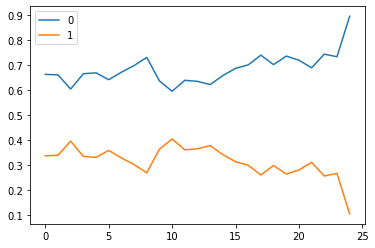

In [ ]:
plt.plot(ls[0])
plt.plot(ls[1])
plt.legend(["0","1"])

In [ ]:
def change(ID):
    df_ele=df1[df1.id==ID].drop(['id'],axis=1)
    if len(df_ele)<4:
        return 1

    df_no_c = df_ele.loc[:, (df_ele != df_ele.iloc[0]).any()]
    model = VARMAX(df_no_c, order=(1, 1))
    model_fit = model.fit()

    # make prediction
    yhat = model_fit.forecast()

    df_tmp=df2_tmp.iloc[ID-1,:]
    df_tmp=df_tmp.to_frame()
    df_tmp=df_tmp.transpose()
    df_tmp=df_tmp.reset_index().drop(['index'],axis=1)

    df_ele=df1[df1.id==ID].drop(['id'],axis=1)

    ls=[[],[]]
    i=len(df_ele)-1
    df_temp=pd.concat([df_tmp,df_ele.iloc[i:i+1,:].reset_index().drop(['index'],axis=1)],axis=1).drop(['payoff_time','default_time'],axis=1)
    #print(df_temp)
    ls[0].append(gbm_ori.predict_proba(df_temp)[0][0])
    ls[1].append(gbm_ori.predict_proba(df_temp)[0][1])

    if yhat.shape[1]==3:
        yhat['interest_rate_time']=df_ele.loc[0,'interest_rate_time']
    df_temp=pd.concat([df_tmp,yhat.reset_index().drop(['index'],axis=1)],axis=1).drop(['payoff_time','default_time'],axis=1)
    ls[0].append(gbm_ori.predict_proba(df_temp)[0][0])
    ls[1].append(gbm_ori.predict_proba(df_temp)[0][1])
    if ls[0][0]<ls[0][1]:
        return 1
    else: return 0

In [ ]:
from tqdm import tqdm
cnt=0
for i in tqdm(range(10,len(df2_tmp))):
    cnt=+change(i+1)

In [ ]:
print(cnt)

6028


In [ ]:
Y.value_counts()

0    34833
1    15149
Name: default_time, dtype: int64

In [ ]:
cnt/15149

0.39791405373291966